## Installing required libraries

In [10]:
!pip install anndata # required to load and explore cell/gene data

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 122.4/122.4 kB 2.7 MB/s eta 0:00:00


In [13]:
!pip install rdflib networkx # requried to convert ontology data into a directed graph

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 531.9/531.9 kB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.7/41.7 kB 4.6 MB/s eta 0:00:00


In [12]:
!pip install owlready2 # required to load and explore ontology data

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.4/27.4 MB 33.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for owlready2: filename=owlready2-0.46-cp310-cp310-linux_x86_64.whl size=24087768 sha256=bed1f29b111440da76ce520fe67ed4405f55e394e8d68c43348d5e9e7e202417
  Stored in directory: /root/.cache/pip/wheels/bf/6f/ef/35df148baa59fc6b243aca4f101e17aed14b67dc1166b73fe0
Successfully built owlready2


In [72]:
!pip install python-louvain #required to run the louvain clustering algorithm

# Data Exploration

## Data overview

Usually we use anndata to operate with our data which is stored in `h5ad` format. You can find more about anndata and the format it stores the data [here](https://anndata.readthedocs.io/en/latest/)

In [14]:
!wget https://storage.googleapis.com/dsp-cellarium-cas-public/neu-broad-challenge/pbmc_10k_neu_challenge_example.h5ad

--2024-06-16 16:38:03--  https://storage.googleapis.com/dsp-cellarium-cas-public/neu-broad-challenge/pbmc_10k_neu_challenge_example.h5ad
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.170.207, 173.194.174.207, 74.125.23.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.170.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 189524066 (181M) [application/octet-stream]
Saving to: ‘pbmc_10k_neu_challenge_example.h5ad’

pbmc_10k_neu_challe 100%[===================>] 180.74M  20.2MB/s    in 10s     

2024-06-16 16:38:13 (18.0 MB/s) - ‘pbmc_10k_neu_challenge_example.h5ad’ saved [189524066/189524066]



In [15]:
import anndata

In [16]:
adata = anndata.read_h5ad("pbmc_10k_neu_challenge_example.h5ad")

General information about the data, here you can see all the metadata variables and data dimensionality. You don't need those metadata variables, this is just an example of the dataset that usually goes through our pipeline tool

In [17]:
adata

AnnData object with n_obs × n_vars = 10246 × 36601
    obs: 'total_mrna_umis', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
    var: 'feature_name'
    uns: 'hvg', 'log1p', 'neighbors', 'pca', 'umap'
    obsm: 'X_pca', 'X_umap'
    obsp: 'connectivities', 'distances'

In [18]:
adata.var # gene metadata

,feature_name
ENSG00000187642,PERM1
ENSG00000078808,SDF4
ENSG00000272106,AL691432.2
ENSG00000162585,FAAP20
ENSG00000272088,AL512413.1
...,...
ENSG00000224281,N/A
ENSG00000122121,XPNPEP2
ENSG00000228836,CT45A5
ENSG00000231937,AC116666.1


In [19]:
print(adata.obs.describe()) # description of cell metadata
print(adata.var.describe()) ## Description of gene metadata


       total_mrna_umis       n_genes  n_genes_by_counts  total_counts  \
count     10246.000000  10246.000000       10246.000000  10246.000000   
mean       7724.294922   2177.836326        2174.470720   7718.298828   
std        3390.274414    708.668308         707.745527   3388.345215   
min        1852.000000   1001.000000        1000.000000   1849.000000   
25%        5303.500000   1650.000000        1648.250000   5299.500000   
50%        6728.000000   1948.000000        1945.000000   6723.000000   
75%        9547.750000   2696.750000        2694.000000   9542.750000   
max       38378.000000   4008.000000        3999.000000  38276.000000   

       total_counts_mt  pct_counts_mt  
count     10246.000000   10246.000000  
mean        701.906860       9.316878  
std         321.352753       2.449145  
min          29.000000       0.832138  
25%         475.250000       7.668347  
50%         623.000000       9.009474  
75%         863.750000      10.613115  
max        3062.000000

In [21]:
print(adata.obs.head())  # Overview of cell metadata
#print(adata.var.head())  # Overview of gene metadata

                    total_mrna_umis  n_genes  n_genes_by_counts  total_counts  \
AAACCCAAGCGCCCAT-1           2204.0     1087               1084        2201.0   
AAACCCACAGAGTTGG-1           5884.0     1835               1834        5882.0   
AAACCCACAGGTATGG-1           5530.0     2215               2215        5529.0   
AAACCCACATAGTCAC-1           5106.0     1613               1611        5101.0   
AAACCCACATCCAATG-1           4572.0     1798               1795        4567.0   

                    total_counts_mt  pct_counts_mt  
AAACCCAAGCGCCCAT-1             52.0       2.362562  
AAACCCACAGAGTTGG-1            633.0      10.761645  
AAACCCACAGGTATGG-1            434.0       7.849521  
AAACCCACATAGTCAC-1            553.0      10.841011  
AAACCCACATCCAATG-1            411.0       8.999343  


In [22]:
print(adata.var.head())  # Overview of gene metadata

                feature_name
ENSG00000187642        PERM1
ENSG00000078808         SDF4
ENSG00000272106   AL691432.2
ENSG00000162585       FAAP20
ENSG00000272088   AL512413.1


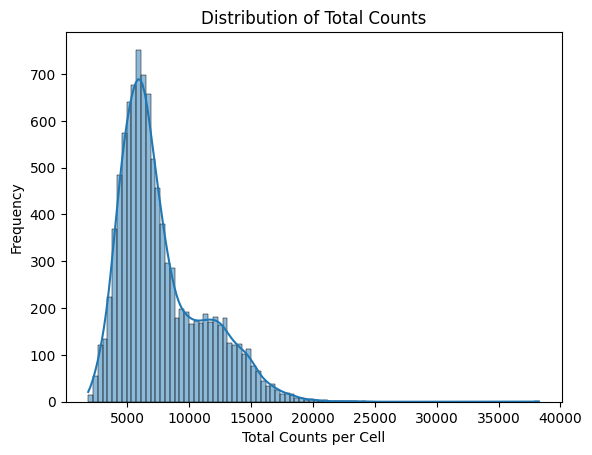

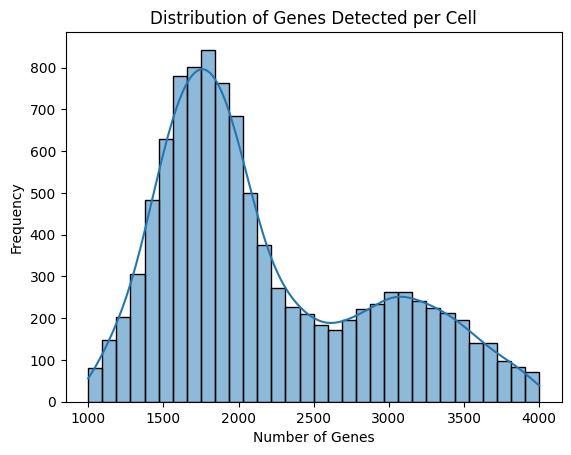

In [23]:
# Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt

if 'total_counts' in adata.obs.columns:
    sns.histplot(adata.obs['total_counts'], kde=True)
    plt.title('Distribution of Total Counts')
    plt.xlabel('Total Counts per Cell')
    plt.ylabel('Frequency')
    plt.show()

if 'n_genes_by_counts' in adata.obs.columns:
    sns.histplot(adata.obs['n_genes_by_counts'], kde=True)
    plt.title('Distribution of Genes Detected per Cell')
    plt.xlabel('Number of Genes')
    plt.ylabel('Frequency')
    plt.show()

In [24]:
# Saving cell metadata summary to CSV
adata.obs.to_csv('cell_metadata_summary.csv')


Representation of the sparse count matrix. (Output of how the slice of raw count matrix looks like)

In [25]:
adata.X[:8, 1365:1375].todense()

matrix([[0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 2., 5., 0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 2., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 5., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 2., 0., 0., 0., 0., 0., 0.],
        [0., 0., 2., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

Feel free to explore the data more if needed...

In [ ]:
type(adata)

anndata._core.anndata.AnnData

In [26]:
adata.obsm['X_pca'] #data representation post PCA

array([[-8.1876917e+00, -4.6821318e+00, -3.5246642e+00, ...,
         1.9453032e+00,  1.5187016e+00,  3.8041594e+00],
       [ 1.5765428e+01, -1.7717158e+00, -1.6964819e+00, ...,
        -9.3396688e-01, -1.2859090e-01,  5.1628625e-01],
       [-1.0010709e+01, -1.3899180e+01,  2.2678814e+01, ...,
         5.9096986e-01,  3.4848340e+00,  2.7135963e+00],
       ...,
       [-9.5101681e+00, -5.2169461e+00,  9.2831385e-01, ...,
         2.2692181e-01, -2.6684330e+00,  1.2178539e+00],
       [-1.0123443e+01, -4.4491625e+00, -4.2090373e+00, ...,
         5.7210505e-01,  1.6622834e+00, -1.6861050e-01],
       [-9.6909933e+00, -2.6117182e+00, -8.2689772e+00, ...,
        -1.8341672e+00,  5.3223449e-01,  7.0484942e-03]], dtype=float32)

## Embeddings

This step is totally unnecessary for the challenge, however for a better understanding, this is what kind of the output, the embedding model (in our case PCA) returns (this value is just a dummy value based on random numbers, but the output looks exactly like this).

In [27]:
import numpy as np


EMBEDDING_DIMENSION = 512

embeddings = np.random.random((adata.shape[0], EMBEDDING_DIMENSION))

In [28]:

embeddings.shape

(10246, 512)

In [29]:
embeddings[:5]

array([[0.5779907 , 0.91522594, 0.17982906, ..., 0.60073657, 0.76654358,
        0.45794746],
       [0.86845349, 0.64675219, 0.75385914, ..., 0.01079902, 0.06729764,
        0.8625322 ],
       [0.5934233 , 0.29657236, 0.37269107, ..., 0.72766579, 0.55615922,
        0.98556121],
       [0.49597222, 0.03691129, 0.59451226, ..., 0.36300797, 0.79136255,
        0.8346491 ],
       [0.14161606, 0.39180857, 0.36155853, ..., 0.74532769, 0.31386444,
        0.62392135]])

## Diving in details with the challenge problem

In [30]:
!wget https://storage.googleapis.com/dsp-cellarium-cas-public/neu-broad-challenge/neu_broad_challenge_inputs.pkl

--2024-06-16 16:41:21--  https://storage.googleapis.com/dsp-cellarium-cas-public/neu-broad-challenge/neu_broad_challenge_inputs.pkl
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.8.207, 142.251.170.207, 173.194.174.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.8.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 50054196 (48M) [application/octet-stream]
Saving to: ‘neu_broad_challenge_inputs.pkl’

neu_broad_challenge 100%[===================>]  47.74M  16.0MB/s    in 3.0s    

2024-06-16 16:41:26 (16.0 MB/s) - ‘neu_broad_challenge_inputs.pkl’ saved [50054196/50054196]



In [31]:
import pickle


with open("./neu_broad_challenge_inputs.pkl", "rb") as f:
    data = pickle.loads(f.read())

In [ ]:
print(len(data['cas_search_output']))

10246


In [32]:
print(type(data))

<class 'dict'>


In [33]:
data.keys() #since data is a dictionary, we print the specific keys in this dictionary

dict_keys(['cas_search_output', 'cas_search_all_neighbors_info'])

## Nearest Neighbor Search Engine
Here's how the output of nearest neighbor search engine looks like. It represents the query_cell_id (the id that user had for each of the input cell) and all neighbors with the distances from the Nearest Neighbor Search Engine.

In [34]:
nearest_neighbors = data["cas_search_output"]
nearest_neighbors[0]

{'query_cell_id': 'AAACCCAAGCGCCCAT-1',
 'neighbors': [{'cas_cell_index': 1296050365, 'distance': 0.9412596821784973},
  {'cas_cell_index': 1290040494, 'distance': 0.9352086186408997},
  {'cas_cell_index': 1280046547, 'distance': 0.9350166916847229},
  {'cas_cell_index': 1288030475, 'distance': 0.9347577095031738},
  {'cas_cell_index': 1384039004, 'distance': 0.9340347051620483},
  {'cas_cell_index': 1524030840, 'distance': 0.9334846138954163},
  {'cas_cell_index': 1288073094, 'distance': 0.933451235294342},
  {'cas_cell_index': 1286087458, 'distance': 0.9332631230354309},
  {'cas_cell_index': 1292095003, 'distance': 0.9331009387969971},
  {'cas_cell_index': 1288025170, 'distance': 0.9326092004776001},
  {'cas_cell_index': 1294014990, 'distance': 0.9325372576713562},
  {'cas_cell_index': 1288025655, 'distance': 0.9325371980667114},
  {'cas_cell_index': 1288027118, 'distance': 0.9320809841156006},
  {'cas_cell_index': 1290041315, 'distance': 0.9316831231117249},
  {'cas_cell_index': 129

In [35]:
len(nearest_neighbors)

10246

In [36]:
cas_search_all_neighbors_info = data['cas_search_all_neighbors_info']
print("Type of cas_search_all_neighbors_info:", type(cas_search_all_neighbors_info)) # print the type of individual key-value pairs in the data dictionary
print("Preview of cas_search_all_neighbors_info:", cas_search_all_neighbors_info[0]) # print the information stored in each key-value pair

Type of cas_search_all_neighbors_info: <class 'list'>
Preview of cas_search_all_neighbors_info: {'cas_cell_index': 1524109823, 'cell_type': 'central memory CD8-positive, alpha-beta T cell', 'assay': "10x 3' v3", 'disease': 'normal', 'suspension_type': 'cell', 'tissue': 'blood', 'cell_type_ontology_term_id': 'CL:0000907', 'assay_ontology_term_id': 'EFO:0009922', 'disease_ontology_term_id': 'PATO:0000461', 'tissue_ontology_term_id': 'UBERON:0000178'}


In [37]:
len(cas_search_all_neighbors_info)

113412

## Cell Metadata

Here is what metdata we store in our database. You can match the cell metadata by `cas_cell_index` and use it for neighborhood context composition. You would need `cell_type` and `cell_type_ontology_term_id` for this task and can ignore other features variables.

In [38]:
data["cas_search_all_neighbors_info"][0]

{'cas_cell_index': 1524109823,
 'cell_type': 'central memory CD8-positive, alpha-beta T cell',
 'assay': "10x 3' v3",
 'disease': 'normal',
 'suspension_type': 'cell',
 'tissue': 'blood',
 'cell_type_ontology_term_id': 'CL:0000907',
 'assay_ontology_term_id': 'EFO:0009922',
 'disease_ontology_term_id': 'PATO:0000461',
 'tissue_ontology_term_id': 'UBERON:0000178'}

In [39]:
# Small check to see if all values represented in data["cas_search_all_neighbors_info"] are unique
# Initialize a set to store the cas_cell_index values
index_set = set()

# Initialize a variable to check uniqueness
is_unique = True

# Iterate over the list containing the dictionary entries
for entry in data["cas_search_all_neighbors_info"]:
    # Check if cas_cell_index is already in the set
    if entry['cas_cell_index'] in index_set:
        is_unique = False
        print(f"Duplicate cas_cell_index found: {entry['cas_cell_index']}")
        break  # Optional: stop at first duplicate
    else:
        # Add the cas_cell_index to the set
        index_set.add(entry['cas_cell_index'])

if is_unique:
    print("All cas_cell_index values are unique.")
else:
    print("There are duplicate cas_cell_index values in the data.")


All cas_cell_index values are unique.


In [40]:
print(len(index_set)) # this length is expected to match the length len(cas_search_all_neighbors_info) from the previous step

113412


## Ontology Data

You might potentially need owlready2 to explore the cell ontology graph

Here is the Cell Ontology OWL file

In [41]:
cl_owl_path = 'https://github.com/obophenotype/cell-ontology/raw/v2022-09-15/cl.owl'

In [42]:
from owlready2 import *

# Load the ontology
onto = get_ontology(cl_owl_path).load()
print(type(onto))


<class 'owlready2.namespace.Ontology'>


In [43]:
print(onto)

get_ontology("http://purl.obolibrary.org/obo/cl.owl#")


In [44]:
print("Classes in the ontology:")
size=0

for cls in onto.classes():
    print(cls.name)
    size+=1
print(size)


Classes in the ontology:
CL_0000000
BFO_0000002
BFO_0000003
BFO_0000004
BFO_0000017
BFO_0000019
BFO_0000020
BFO_0000031
BFO_0000034
BFO_0000023
BFO_0000016
BFO_0000040
BFO_0000006
CARO_0000003
BFO_0000141
CARO_0000010
CARO_0001001
PATO_0002124
BFO_0000015
CL_0000540
CARO_0000006
CARO_0001010
RO_0002577
UBERON_0001637
UBERON_0001638
CARO_0010000
CARO_0000000
GO_0008150
PATO_0000402
UBERON_0000475
UBERON_0010912
CL_0000101
PATO_0000001
UBERON_0004111
UBERON_0000463
BFO_0000009
CHEBI_50906
CARO_0030000
CARO_0000007
PATO_0002266
PATO_0010000
CARO_0000004
CARO_0001008
PATO_0000125
CARO_0000012
CARO_0010004
CARO_0000013
CARO_0020003
CARO_0000014
CARO_0000040
CARO_0000042
CARO_0001000
CARO_0000032
PATO_0002309
PATO_0001993
CARO_0020000
PATO_0010001
CHEBI_10545
CHEBI_36338
CHEBI_131565
CHEBI_17478
CHEBI_35341
CHEBI_131604
CHEBI_76969
CHEBI_131621
CHEBI_35509
CHEBI_131927
CHEBI_36586
CHEBI_132153
CHEBI_61469
CHEBI_63551
CHEBI_16336
CHEBI_136849
CHEBI_33247
CHEBI_136889
CHEBI_138103
CHEBI_39141


* Owlready2 * Warning: ignoring cyclic subclass of/subproperty of, involving:
  http://purl.obolibrary.org/obo/BFO_0000023
  http://purl.obolibrary.org/obo/CHEBI_50906

* Owlready2 * Warning: ignoring cyclic subclass of/subproperty of, involving:
  http://purl.obolibrary.org/obo/CHEBI_36080
  http://purl.obolibrary.org/obo/PR_000000001



Streaming output truncated to the last 5000 lines.
GO_1904705
GO_1990874
GO_1904706
GO_1904707
GO_1904708
GO_1904709
GO_1904710
GO_1904724
GO_1904738
GO_1990316
GO_1904749
GO_1904750
GO_1904751
GO_1904752
GO_1904753
GO_1904754
GO_1904760
GO_1904761
GO_1904762
GO_1904770
GO_1904776
GO_1904777
GO_1904778
GO_1904793
GO_1990188
GO_1904794
GO_1904795
GO_1904817
UBERON_0000042
GO_1904818
GO_1904820
GO_1904819
GO_1904829
GO_1905063
GO_1904830
GO_1905064
GO_1904831
GO_1905065
GO_1904835
GO_1990791
GO_1904836
GO_1904838
GO_1904839
GO_1904840
GO_1904861
UBERON_0010323
GO_1904889
GO_1904890
GO_1904891
GO_1904897
GO_1990922
GO_1904898
GO_1904899
GO_1904933
GO_1904934
GO_1904935
GO_1904937
GO_1904942
GO_1904943
GO_1904944
GO_1904948
GO_1904956
GO_1904957
GO_1904958
GO_1904969
GO_1904977
GO_1904987
GO_1904988
GO_1904989
GO_1905027
GO_1905028
GO_1905029
GO_1905030
GO_1905040
GO_1905069
UBERON_0004340
GO_1905070
GO_1905071
GO_1905073
GO_1905074
GO_1905075
GO_1905079
GO_1905080
GO_1905081
GO_1905103
GO

In [45]:
cls.label # cell type

['placental vein']

In [46]:
cls.name # cell ID

'UBERON_8480008'

In [47]:
print("Annotations in the ontology:")
for ann in onto.annotation_properties():
    print(ann, ann.label)

Annotations in the ontology:
rdf-schema.comment []
rdf-schema.label []
owl.deprecated []
rdf-schema.seeAlso []
obo.IAO_0000700 ['has ontology root term', 'preferred_root']
terms.contributor ['contributor']
terms.license ['license']
obo.IAO_0000111 []
obo.IAO_0000112 []
obo.IAO_0000114 []
obo.IAO_0000115 ['definition']
obo.IAO_0000116 ['editor note']
obo.IAO_0000117 []
obo.IAO_0000118 []
obo.IAO_0000119 []
obo.IAO_0000231 []
obo.IAO_0000232 []
obo.IAO_0000233 []
obo.IAO_0000424 ['expand expression to']
obo.IAO_0000425 []
obo.IAO_0000426 []
obo.IAO_0000589 []
obo.IAO_0000600 []
obo.IAO_0100001 ['term replaced by']
obo.IAO_creation_date []
obo.IAO_scope []
obo.OMO_0002000 []
obo.RO_0001900 []
obo.RO_0002161 ['never in taxon', 'never_in_taxon']
obo.RO_0002171 []
obo.RO_0002174 []
obo.RO_0002175 [locstr('present in taxon', 'en'), 'present_in_taxon']
obo.RO_0002259 []
oboInOwl.SubsetProperty ['subset_property']
obo.RO_0002475 []
obo.RO_0002575 []
obo.RO_0002581 ['is a defining property chain

# Proposed Algorithm Implementation

## Stage 1: Working with Reference Dataset with Known Cell Type Hierarchy

### Data Preprocessing for Step 1 in Stage 1: Converting oncology to directed graph

In [48]:
# Checking the format of ontology data stored
import rdflib

def guess_format(owl_file):
    formats = ['xml', 'turtle', 'n3']
    for fmt in formats:
        try:
            g = rdflib.Graph()
            g.parse(owl_file, format=fmt)
            print(f"Successfully parsed with format: {fmt}")
            return fmt
        except Exception as e:
            print(f"Failed to parse with format: {fmt}. Error: {e}")
    print("Could not determine the format of the OWL file.")
    return None

# Example usage
owl_file = 'https://github.com/obophenotype/cell-ontology/raw/v2022-09-15/cl.owl'
detected_format = guess_format(owl_file)
print(f"Detected format: {detected_format}")


Successfully parsed with format: xml
Detected format: xml


In [49]:
# Converting the provided ontology data into a directed graph
import rdflib
import networkx as nx

def create_graph_from_owl(owl_file):
    # Load the ontology using rdflib
    g = rdflib.Graph()

    # Parse the OWL file with explicit format
    g.parse(owl_file, format='xml')  # Change 'xml' to the correct format if needed

    # Create a directed graph using networkx
    graph = nx.DiGraph()

    # Define the RDF and OWL namespaces
    RDF_TYPE = rdflib.RDF.type
    OWL = rdflib.namespace.OWL
    RDFS = rdflib.namespace.RDFS

    # Efficiently add nodes and edges
    for s, p, o in g.triples((None, RDF_TYPE, OWL.Class)):
        graph.add_node(s)

    for s, p, o in g.triples((None, RDFS.subClassOf, None)):
        graph.add_edge(o, s)  # Edge direction: parent -> child

    return graph

# Example usage
owl_file = 'https://github.com/obophenotype/cell-ontology/raw/v2022-09-15/cl.owl'
graph = create_graph_from_owl(owl_file)

# Print the number of nodes and edges
print(f"Graph has {graph.number_of_nodes()} nodes and {graph.number_of_edges()} edges")


Graph has 50001 nodes and 47374 edges


In [50]:
# Saving the newly created Directed Graph into a json file
from networkx.readwrite import json_graph
import json
# Convert the graph to a JSON-compatible format
data = json_graph.node_link_data(graph)

# Save the graph to a JSON file
with open('cell_type_hierarchy.json', 'w') as f:
    json.dump(data, f, indent=4)

In [ ]:
# Optionally, load the graph back from the JSON file to verify
with open('cell_type_hierarchy.json', 'r') as f:
    loaded_data = json.load(f)
    loaded_graph = json_graph.node_link_graph(loaded_data)

print(f"Loaded graph has {loaded_graph.number_of_nodes()} nodes and {loaded_graph.number_of_edges()} edges")

Loaded graph has 50001 nodes and 47374 edges


### Step 1 of Stage 1: Only keeping the cell types that have direct vertical lineage with query cell type for further clustering

In [ ]:
# FUNCTION TO CALCULATE THE HIERARCHICAL DISTANCE BETWEEN QUERY CELL AND NEIGHBORING CELL
import networkx as nx

# Function to calculate the hierarchical distance considering only direct vertical relationships
def vertical_hierarchy_distance(cell_type1, cell_type2, graph):
    try:
        # Check path from cell_type1 to cell_type2
        path = nx.shortest_path(cell_type_graph, source=cell_type1, target=cell_type2)
        return len(path) - 1  # The length of the path minus one (number of edges)
    except nx.NetworkXNoPath:
        pass  # No path found from cell_type1 to cell_type2

    try:
        # Check path from cell_type2 to cell_type1
        path = nx.shortest_path(cell_type_graph, source=cell_type2, target=cell_type1)
        return len(path) - 1  # The length of the path minus one (number of edges)
    except nx.NetworkXNoPath:
        pass  # No path found from cell_type2 to cell_type1

    return float('inf')  # No path found in either direction



In [67]:
# Example usage
# Create an unweighted directed graph
cell_type_graph = nx.DiGraph()

# Add nodes and edges according to the hierarchy described
cell_type_graph.add_edges_from([
    ('Cell1', 'Cell1.1'),
    ('Cell1', 'Cell1.2'),
    ('Cell1.2', 'Cell1.2.1'),
    ('Cell1.2', 'Cell1.2.2'),
    ('Cell1.1', 'Cell1.1.1'),
    ('Cell1.1.1', 'Cell1.2.1')
])

# Calculate the distance between a query cell type and a neighbor cell type
cluster_to_not_consider = {}
cells_to_consider = {}
cell_types_not_considered = []
cell_type_considered_cell_types = []
distance_of_considered_cell_types = []
query_cell = input('Please enter the name of the query cell: ')


for i in cell_type_graph.nodes():
  if i != query_cell:
    neighbor_cell = i

  else:
    continue
  if vertical_hierarchy_distance(query_cell, neighbor_cell, cell_type_graph) == float('inf'):
    cell_types_not_considered.append(neighbor_cell) #these cell types do not have direct vertical linear with the query cell and will therefore not be considered for further processing
  else:
   cell_type_considered_cell_types.append(neighbor_cell) #these cell types have direct vertical lineage with the query cell
   distance_of_considered_cell_types.append(vertical_hierarchy_distance(query_cell, neighbor_cell, cell_type_graph)) #their vertical distance from the query cell is stored

cluster_to_not_consider['cell_types'] = cell_types_not_considered
cells_to_consider['cell_types'] = cell_type_considered_cell_types
cells_to_consider['distance'] = distance_of_considered_cell_types
print('Cell types of discarded cells are: ', cluster_to_not_consider)
print('Cell types of considered cells are: ', cells_to_consider['cell_types'])
print('Distances of Cell types of considered cells are: ', cells_to_consider['distance'])



Please enter the name of the query cell: Cell1.1
Cell types of discarded cells are:  {'cell_types': ['Cell1.2', 'Cell1.2.2']}
Cell types of considered cells are:  ['Cell1', 'Cell1.2.1', 'Cell1.1.1']
Distances of Cell types of considered cells are:  [1, 2, 1]


### Calculating edge weights between query cell type and neighbor cell types to consider as weights when using the Louvain Clustering algorithm

In [70]:
# Function to calculate edge weights between each query cell type and neighbor cell type
def edge_weights(query_cell, neighbor_distance):
  edge_weights = {}
  edge_weights['query_cell'] = query_cell
  weights=[]
  neighbor_cell=[]
  for i in range(len(neighbor_distance['cell_type'])):
    weights.append(1/neighbor_distance['distance'][i])
    neighbor_cell.append(neighbor_distance['cell_type'][i])
  edge_weights['neighbor_cells'] = neighbor_cell
  edge_weights['weights'] = weights
  return edge_weights


In [71]:
#Example explained in the paper
#example graph
cell_type_graph = nx.DiGraph()

# Add nodes and edges according to the hierarchy described
cell_type_graph.add_edges_from([
    ('cell_1', 'cell_2'),
    ('cell_1', 'cell_3'),
    ('cell_2', 'cell_4')
])

# Considering 'cell_4' as the query cell, only 'cell_1' and 'cell_2' will be considered. 'cell_3' is discarded in step 1 due to not having direct vertical lineage
query_cell = 'cell_4'
# Assumed nearest neighbor distances
neighbor_distance = {'cell_type':['cell_1','cell_2'],'distance':[0.5,0.4]}
print(edge_weights(query_cell, neighbor_distance))

{'query_cell': 'cell_4', 'neighbor_cells': ['cell_1', 'cell_2'], 'weights': [2.0, 2.5]}


### Clustering neighbor cell types using the louvain algorithm

In [75]:
import networkx as nx
import community.community_louvain as community_louvain

# Initialize the graph
cell_type_graph = nx.Graph()

# Add edges to the graph
cell_type_graph.add_edges_from([
    ('cell_1', 'cell_2'),
    ('cell_2', 'cell_4')
])

# Input data
input_data = {'query_cell': 'cell_4', 'neighbor_cells': ['cell_1', 'cell_2'], 'weights': [2.0, 2.5]}

# Add weighted edges between the query cell and its neighbor cells
for neighbor, weight in zip(input_data['neighbor_cells'], input_data['weights']):
    cell_type_graph.add_edge(input_data['query_cell'], neighbor, weight=weight)

# Apply Louvain clustering
partition = community_louvain.best_partition(cell_type_graph, weight='weight')

# Print the partition (cluster assignments)
print("Cluster assignments:", partition)
#For this particular input, it seems like neighbor cell types 'cell_1' and 'cell_2' are part of the same cluster

Cluster assignments: {'cell_1': 0, 'cell_2': 0, 'cell_4': 0}


### Implementing Step 2 of Stage 1: Ranking Clusters

In [76]:
# Cluster Ranking example from the submitted paper
import numpy as np

# Define the clusters
clusters = {
    'Cluster 1': ['A', 'B', 'C'],
    'Cluster 2': ['D', 'E'],
    'Cluster 3': ['F', 'G', 'H']
}

# Define the hierarchical distances from the query cell Q
distances = {
    'A': 2,
    'B': 3,
    'C': 1,
    'D': 5,
    'E': 4,
    'F': 7,
    'G': 8,
    'H': 6
}

# Calculate the average hierarchical distance for each cluster
average_distances = {}
for cluster_name, cell_types in clusters.items():
    avg_distance = np.mean([distances[cell] for cell in cell_types])
    average_distances[cluster_name] = avg_distance

# Print the average distances for each cluster
print("Average hierarchical distances for each cluster:")
for cluster_name, avg_distance in average_distances.items():
    print(f"{cluster_name}: {avg_distance}")

# Calculate the median of the average hierarchical distances
median_distance = np.median(list(average_distances.values()))
print(f"\nMedian of average hierarchical distances: {median_distance}")

# Calculate the absolute differences from the median for each cluster's average distance
differences_from_median = {cluster_name: abs(avg_distance - median_distance) for cluster_name, avg_distance in average_distances.items()}

# Rank the clusters based on these differences
ranked_clusters = sorted(differences_from_median.items(), key=lambda x: x[1])

# Print the ranking of clusters
print("\nRanking of clusters based on proximity to the median of average hierarchical distances:")
for rank, (cluster_name, difference) in enumerate(ranked_clusters, 1):
    print(f"Rank {rank}: {cluster_name} (Difference: {difference})")


Average hierarchical distances for each cluster:
Cluster 1: 2.0
Cluster 2: 4.5
Cluster 3: 7.0

Median of average hierarchical distances: 4.5

Ranking of clusters based on proximity to the median of average hierarchical distances:
Rank 1: Cluster 2 (Difference: 0.0)
Rank 2: Cluster 1 (Difference: 2.5)
Rank 3: Cluster 3 (Difference: 2.5)


## Stage 2: Working with Unseen Data with Unknown Cell Type Hierarchy

In [85]:
# As explained in the paper, consider the following unknown query cell:
unknown_query_cell_id = 'AA'

# Assume the following nearest neighbor distances with refence cell types:
nearest_neighbor_distances = {
    'A': 2,
    'B': 3,
    'C': 1,
    'D': 5,
    'E': 4,
    'F': 7,
    'G': 8,
    'H': 6,
    'I': 3,
    'J': 5,
    'K': 2,
    'L': 4,
    'M': 6,
    'N': 7,
    'O': 8,
    'P': 2,
    'Q': 3,
    'R': 5,
    'S': 6,
    'T': 7,
    'U': 8,
    'V': 1,
    'W': 4,
    'X': 5,
    'Y': 3,
    'Z': 2
}

# We first sort these distances in ascending order, and then consider the top 10 nearest neighbor cell types
sorted_nearest_neighbors = dict(sorted(nearest_neighbor_distances.items(), key=lambda item: item[1]))
ten_nearest_neighbors = dict(list(sorted_nearest_neighbors.items())[:10])
# Print the first 10 sorted nearest neighbor distances
print("First 10 sorted nearest neighbor distances:")
for key, value in ten_nearest_neighbors.items():
    print(f"{key}: {value}")


First 10 sorted nearest neighbor distances:
C: 1
V: 1
A: 2
K: 2
P: 2
Z: 2
B: 3
I: 3
Q: 3
Y: 3


In [86]:
# the next step is to consider the top 3 ranked clusters for each of the 10 neighbors to get a total of 30 clusters
# We assume the following 30 clusters to be then ranked. Please notice that each neighbor cell type from the eariler sorted list is also added to the 3 clusters
# For ex: 'Cluster C1', 'Cluster C2' and 'Cluster C3' contain the cell type 'C'
# We attain these clusters from the ranked clusters formed for each reference cell at the end of Stage 1
clusters = {
    'Cluster C1': ['A', 'B', 'C'],
    'Cluster C2': ['C','D', 'E'],
    'Cluster C3': ['c', 'F', 'G', 'H'],
    'Cluster V1': ['V','I', 'J'],
    'Cluster V2': ['V','K', 'L', 'M', 'N'],
    'Cluster V3': ['V','O', 'P', 'Q'],
    'Cluster A1': ['A','R', 'S', 'T', 'U', 'V'],
    'Cluster A2': ['A','W', 'X'],
    'Cluster A3': ['A','Y', 'Z', 'A'],
    'Cluster K1': ['K','B', 'C', 'D'],
    'Cluster K2': ['K','E', 'F'],
    'Cluster K3': ['K','G', 'H', 'I'],
    'Cluster P1': ['P','J', 'K'],
    'Cluster P2': ['P','L', 'M', 'N'],
    'Cluster P3': ['O', 'P'],
    'Cluster Z1': ['Z','Q', 'R', 'S'],
    'Cluster Z2': ['Z','T', 'U', 'V'],
    'Cluster Z3': ['W', 'X', 'Y', 'Z'],
    'Cluster B1': ['A', 'B', 'C', 'D'],
    'Cluster B2': ['B','E', 'F', 'G'],
    'Cluster B3': ['B','H', 'I'],
    'Cluster I1': ['I','J', 'K', 'L'],
    'Cluster I2': ['I','M', 'N', 'O'],
    'Cluster I3': ['I','P', 'Q'],
    'Cluster Q1': ['Q','R', 'S', 'T'],
    'Cluster Q2': ['Q','U', 'V', 'W'],
    'Cluster Q3': ['Q','X', 'Y', 'Z'],
    'Cluster Y1': ['Y','A', 'D', 'G', 'J'],
    'Cluster Y2': ['Y','B', 'E', 'H', 'K'],
    'Cluster Y3': ['Y','C', 'F', 'I', 'L']
}


In [87]:
# Since we already have a dictionary with the nearest neighbor distances for each cell type ('nearest_neighbor_distances'),
# we rank the clusters above based on the average nearest neighbor distance of all cells in each cluster
import numpy as np
# Calculate the average nearest neighbor distance for each cluster
average_nearest_neighbor_distance = {}
for cluster_name, cell_types in clusters.items():
    # Filter out any cell types not in the nearest_neighbor_distances dictionary
    valid_cells = [cell for cell in cell_types if cell in nearest_neighbor_distances]
    # Get the nearest neighbor distances for the valid cells in the cluster
    distances = [nearest_neighbor_distances[cell] for cell in valid_cells]
    # Calculate the average distance if there are valid cells
    if distances:
        avg_distance = np.mean(distances)
        # Store the result in the dictionary
        average_nearest_neighbor_distance[cluster_name] = avg_distance
    else:
        average_nearest_neighbor_distance[cluster_name] = None  # Handle clusters with no valid cells

# Print the average nearest neighbor distances for each cluster
print("Average nearest neighbor distances for each cluster:")
for cluster_name, avg_distance in average_nearest_neighbor_distance.items():
    if avg_distance is not None:
        print(f"{cluster_name}: {avg_distance}")
    else:
        print(f"{cluster_name}: No valid cells with distances")


Average nearest neighbor distances for each cluster:
Cluster C1: 2.0
Cluster C2: 3.3333333333333335
Cluster C3: 7.0
Cluster V1: 3.0
Cluster V2: 4.0
Cluster V3: 3.5
Cluster A1: 4.833333333333333
Cluster A2: 3.6666666666666665
Cluster A3: 2.25
Cluster K1: 2.75
Cluster K2: 4.333333333333333
Cluster K3: 4.75
Cluster P1: 3.0
Cluster P2: 4.75
Cluster P3: 5.0
Cluster Z1: 4.0
Cluster Z2: 4.5
Cluster Z3: 3.5
Cluster B1: 2.75
Cluster B2: 5.5
Cluster B3: 4.0
Cluster I1: 3.5
Cluster I2: 6.0
Cluster I3: 2.6666666666666665
Cluster Q1: 5.25
Cluster Q2: 4.0
Cluster Q3: 3.25
Cluster Y1: 4.6
Cluster Y2: 3.6
Cluster Y3: 3.6


In [96]:
# From the output above, it seems like Cluster C1 describes the unknown query cell the best
print(f'Nearest cluster to describe the unknown query cell {unknown_query_cell_id} is {list(average_nearest_neighbor_distance.keys())[0]}')
print(f'the cell types in this nearest cluster are {clusters[list(average_nearest_neighbor_distance.keys())[0]]}')

Nearest cluster to describe the unknown query cell ['AA'] is Cluster C1
the cell types in this nearest cluster are ['A', 'B', 'C']
